In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 라벨 불균형을 위한 라이브러리
import imblearn
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [2]:
df = pd.read_csv("../data/240603/sampling_data.csv", index_col=0)
df["label"].value_counts()

0    500
1    100
Name: label, dtype: int64

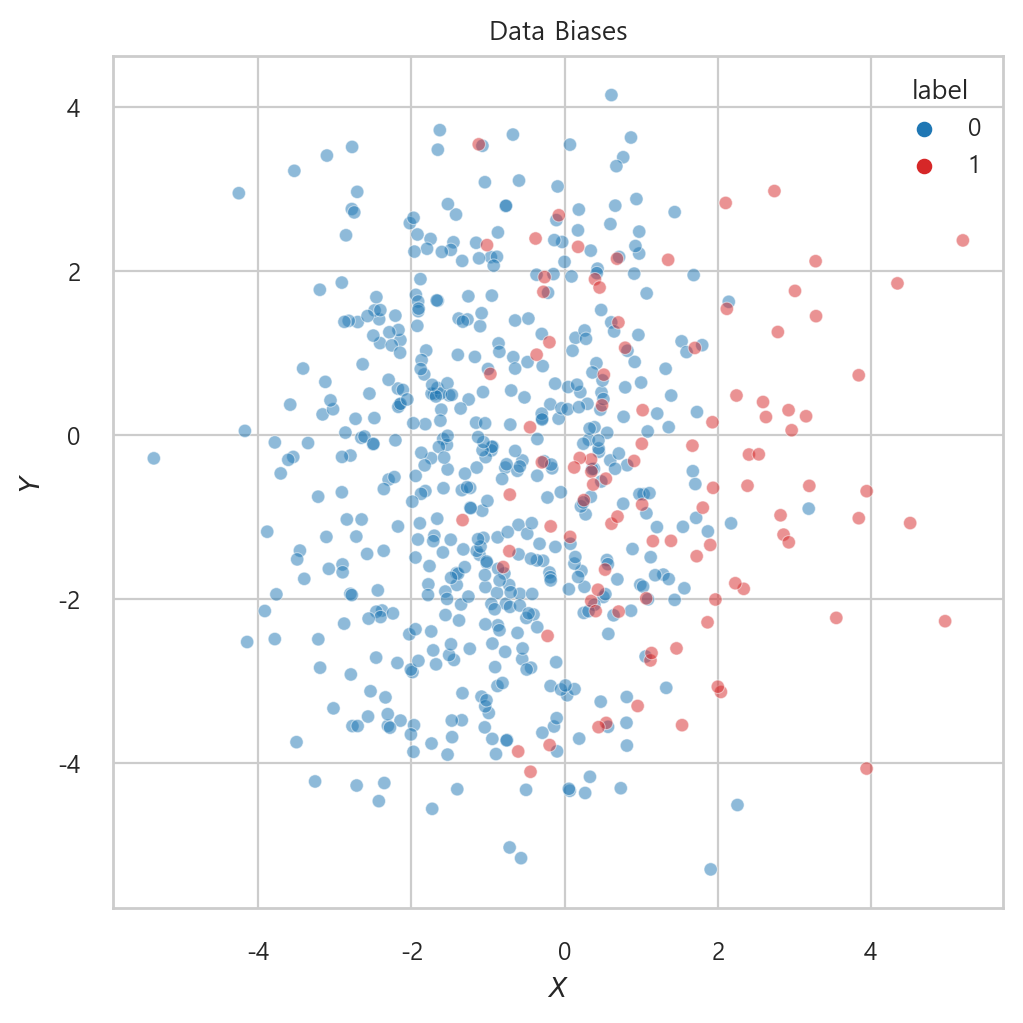

In [15]:
fig, ax = plt.subplots(1,1, figsize = (5,5))

sns.scatterplot(data=df,
                x="x",
                y="y",
                palette={0: 'tab:blue', 1: 'tab:red'},
                alpha = 0.5,
                hue="label",
                ax=ax);

ax.set(xlabel = R"$X$",
       ylabel = R"$Y$",
       title = "Data Biases");

#### 1. Under Sampling
- 작은거에서 많은거로

In [4]:

def sampler_img(x,y,name):  
    df_s = pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis=1)
    df_s.columns = ["x","y","label"]  
    fig, ax = plt.subplots(1,2, figsize = (8,4))
    c = {0: 'tab:blue', 1: 'tab:red'}
    sns.scatterplot(data=df,
                    x="x",
                    y="y",
                    palette=c,
                    alpha = 0.5,
                    hue="label",
                    ax=ax[0]);
    
    ax[0].set(xlabel = R"$X$",
           ylabel = R"$Y$",
           title = "Original");

    sns.scatterplot(data=df_s,
                    x="x",
                    y="y",
                    palette=c,
                    alpha = 0.5,
                    hue="label",
                    ax=ax[1]);
    
    ax[1].set(xlabel = R"$X$",
           ylabel = R"$Y$",
           title = f"{name}");

In [16]:
x_train = df[["x","y"]].values
y_train = df["label"].values

(array([0, 1], dtype=int64), array([100, 100], dtype=int64))

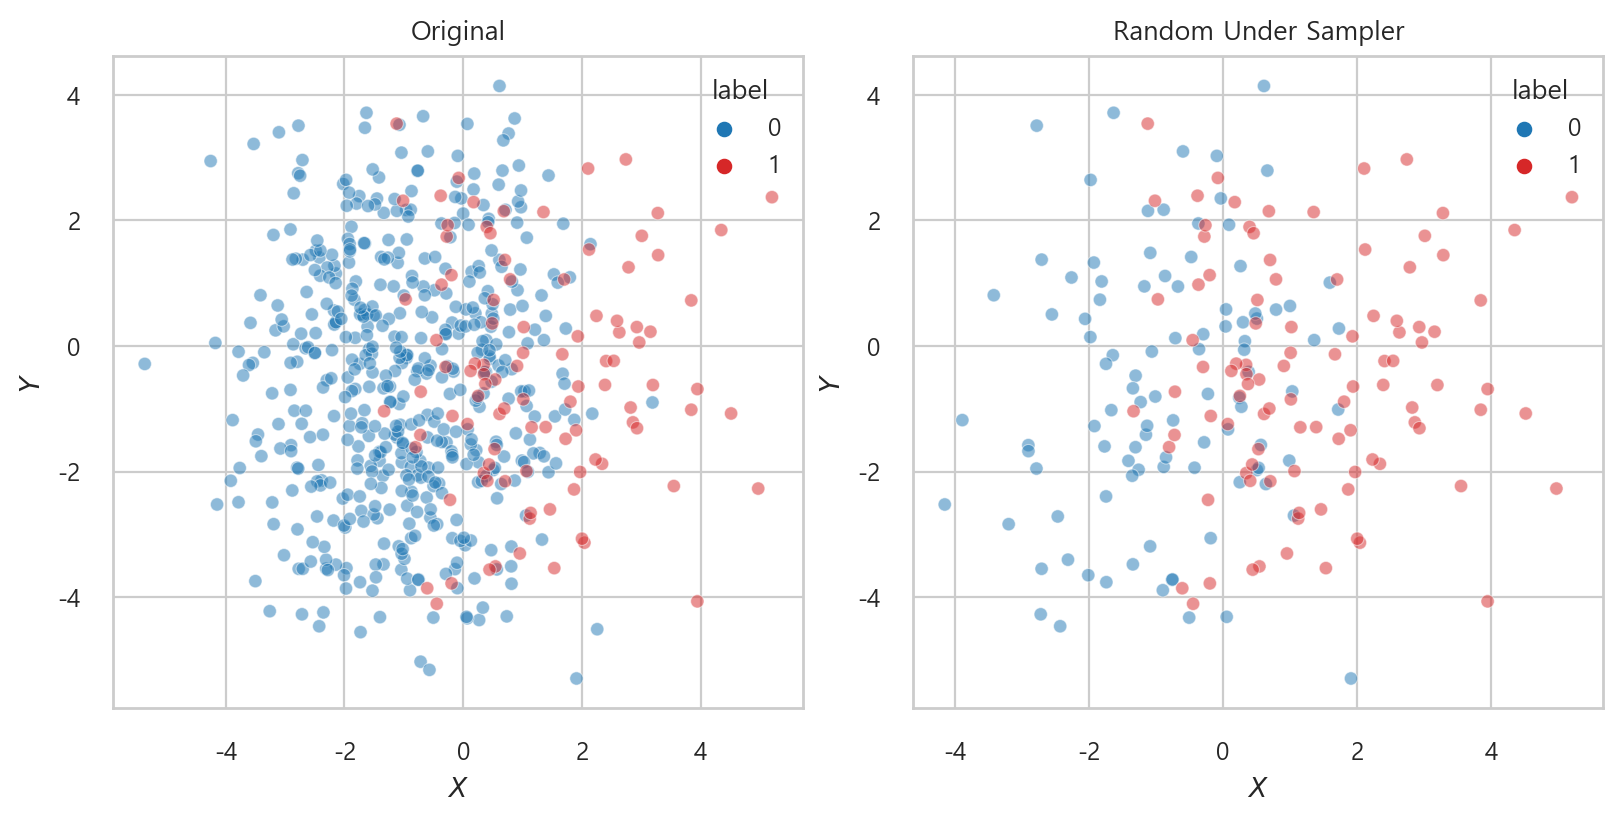

In [33]:
rus = RandomUnderSampler(random_state=0)
x_rus, y_rus = rus.fit_resample(x_train,y_train)

sampler_img(x_rus,y_rus, "Random Under Sampler")
np.unique(y_rus, return_counts=True)

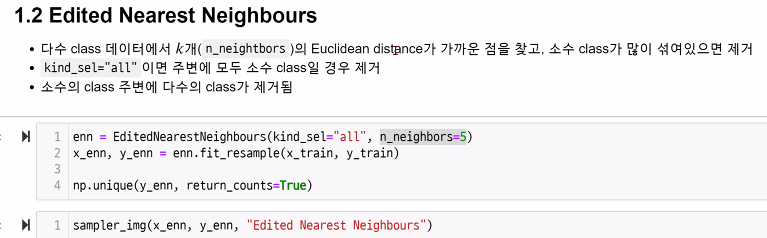

(array([0, 1], dtype=int64), array([330, 100], dtype=int64))

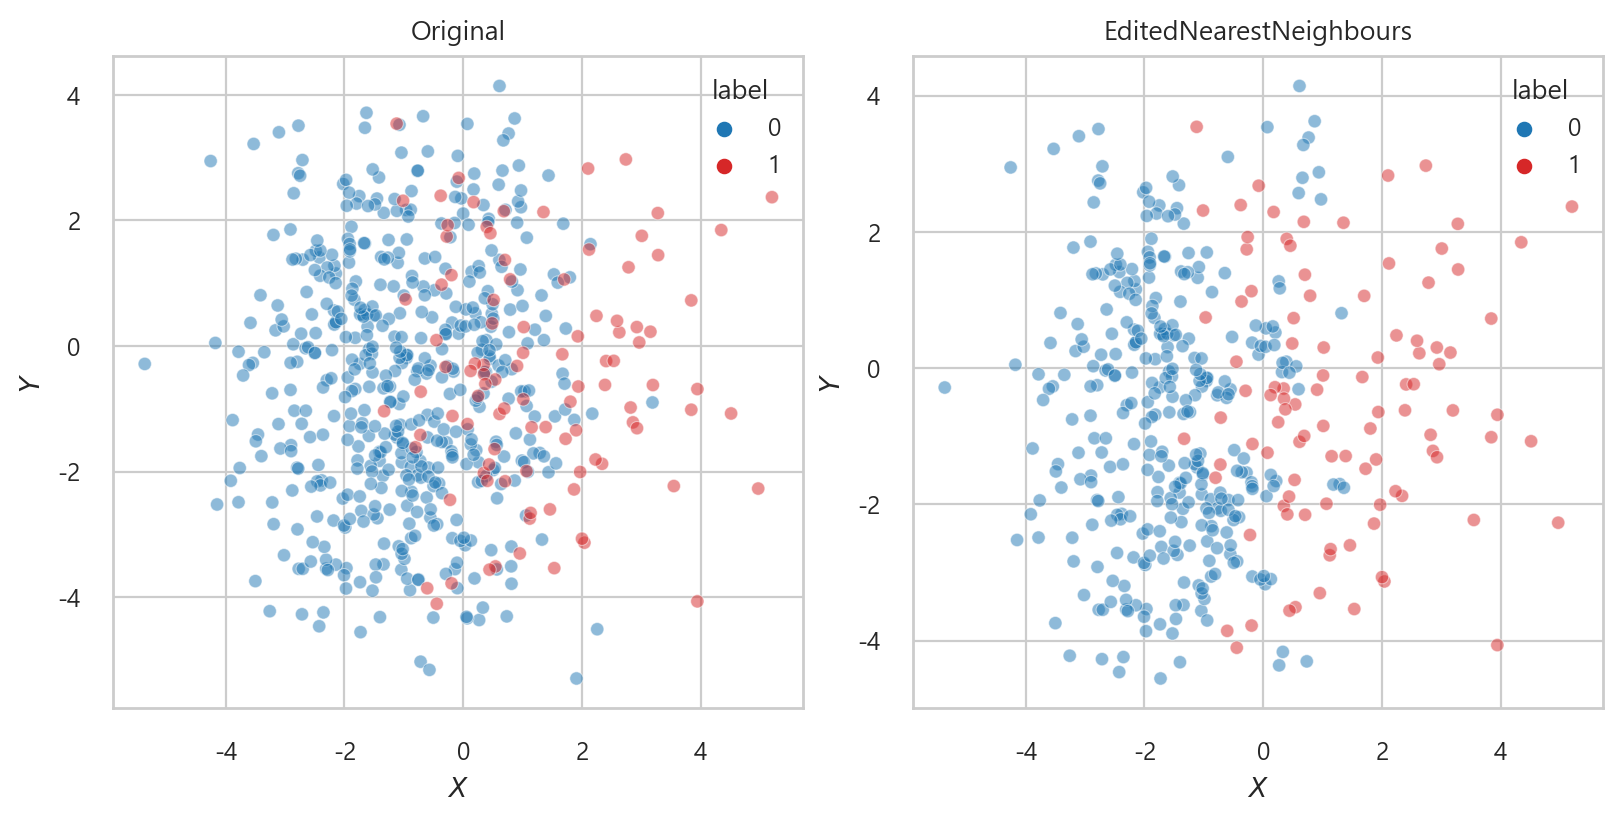

In [34]:
enn = EditedNearestNeighbours(kind_sel="all", n_neighbors=5)
x_enn, y_enn = enn.fit_resample(x_train,y_train)

sampler_img(x_enn,y_enn, "EditedNearestNeighbours")
np.unique(y_enn, return_counts=True)

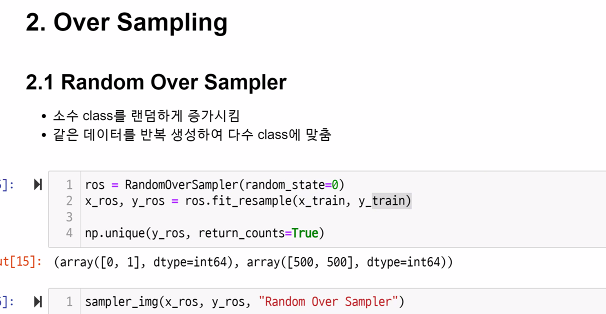

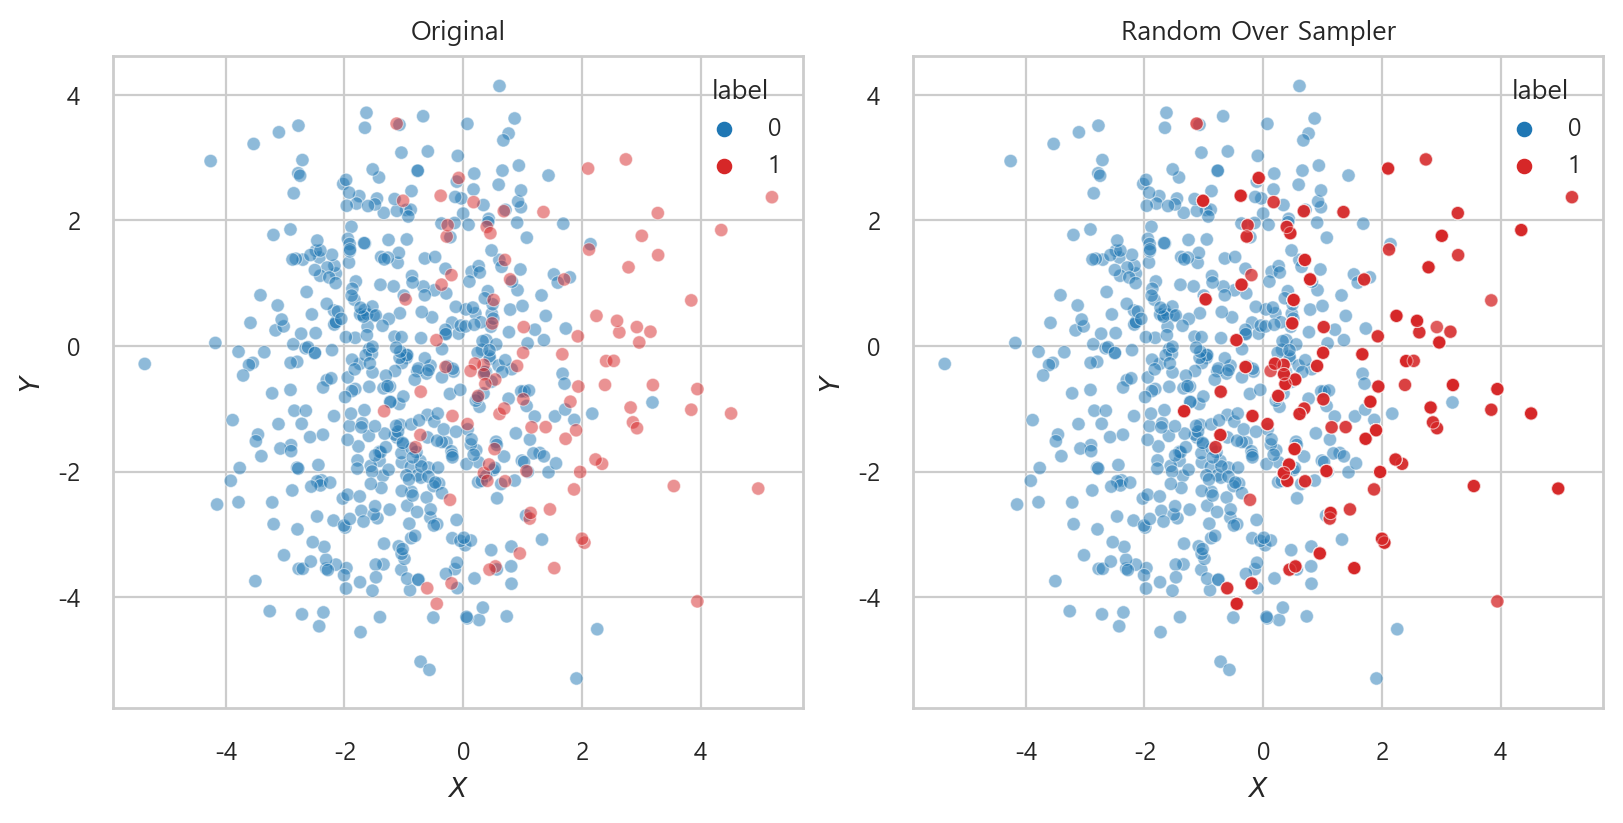

In [8]:
ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(x_train,y_train)

sampler_img(x_ros,y_ros,"Random Over Sampler")

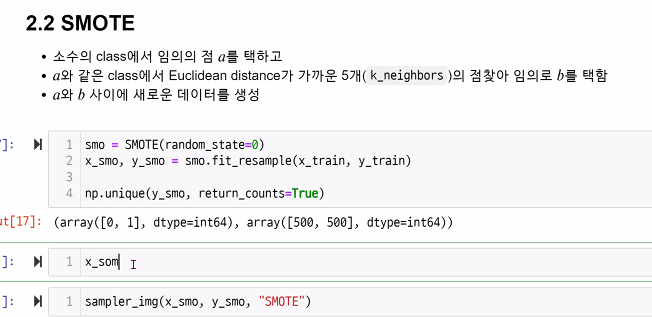`

(array([0, 1], dtype=int64), array([500, 500], dtype=int64))

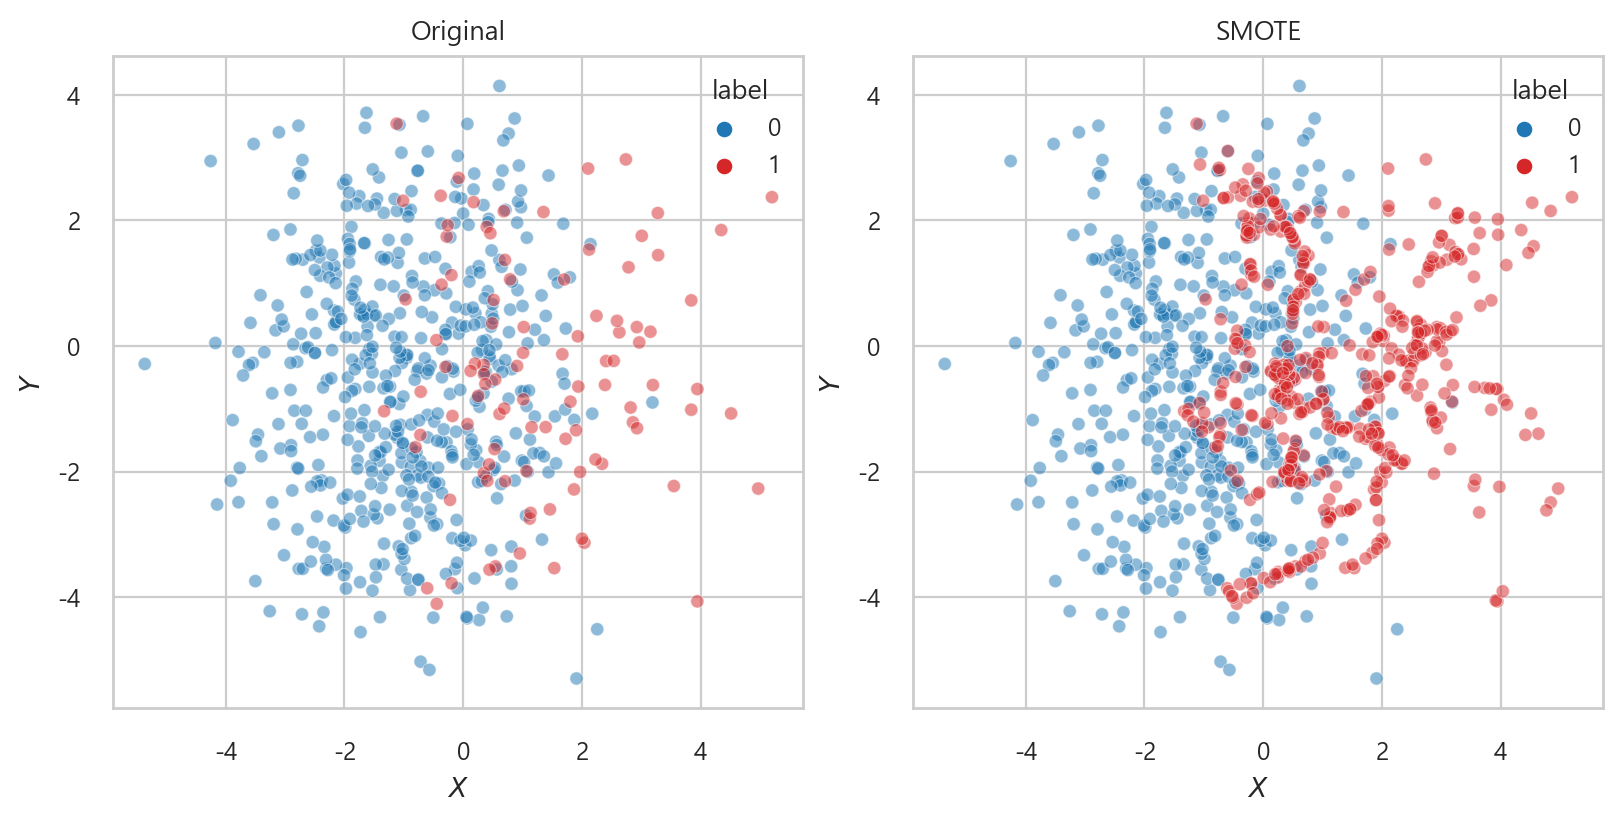

In [35]:
smo = SMOTE(random_state=0)
x_smo, y_smo = smo.fit_resample(x_train,y_train)
sampler_img(x_smo,y_smo,"SMOTE")
np.unique(y_smo, return_counts=True)

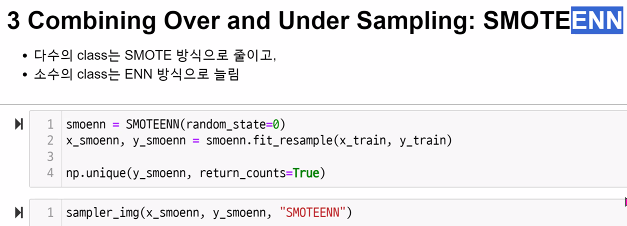

In [11]:
smoenn = SMOTEENN(random_state=0)
x_smoenn, y_smoenn = smoenn.fit_resample(x_train,y_train)
np.unique(y_smoenn, return_counts=True)

(array([0, 1], dtype=int64), array([320, 325], dtype=int64))

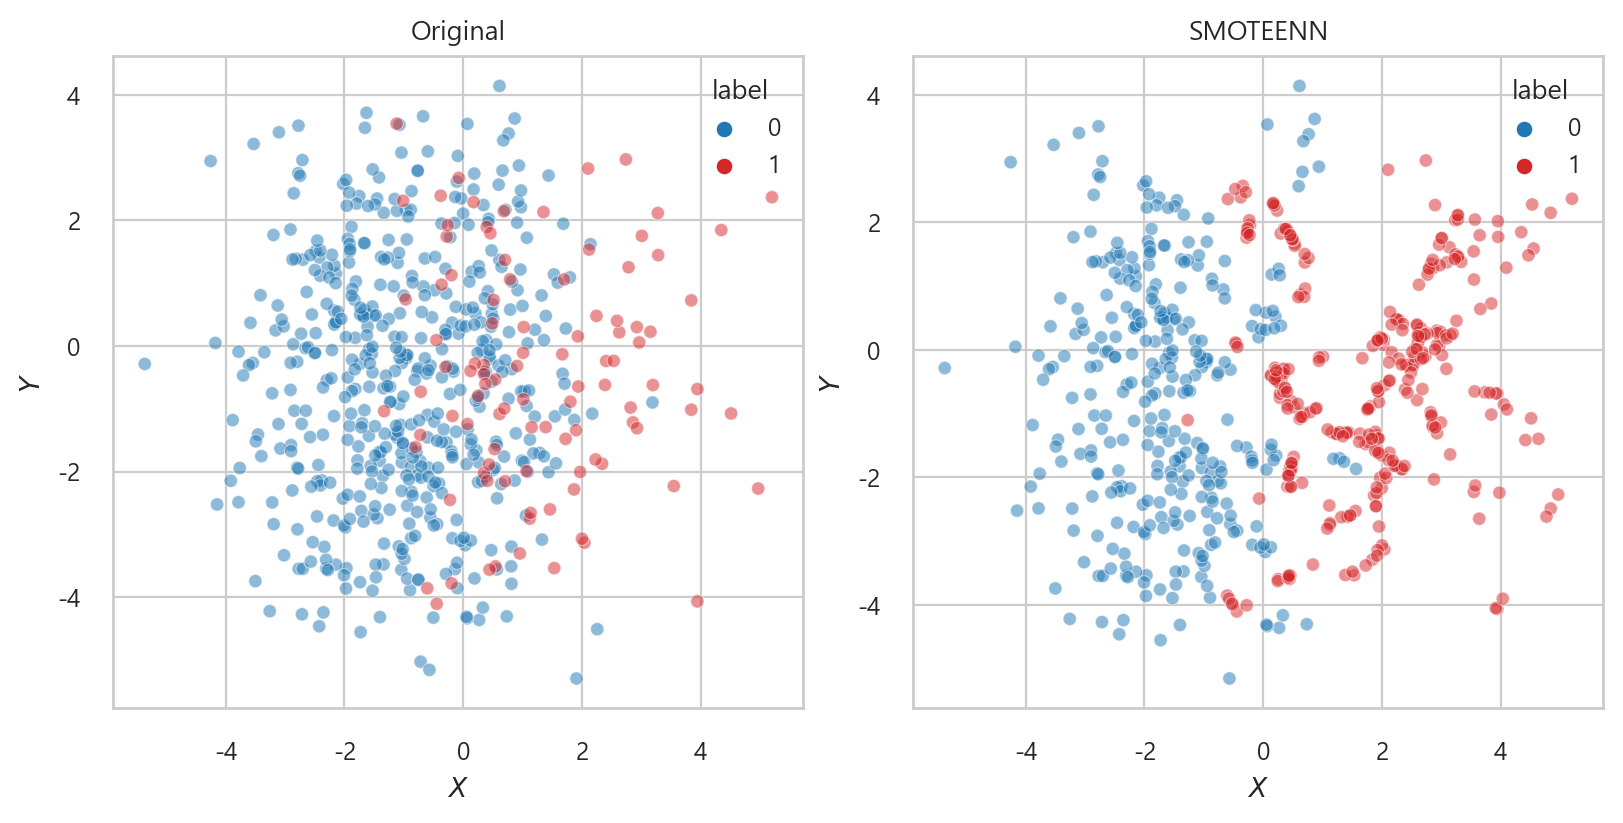

In [12]:
sampler_img(x_smoenn,y_smoenn,"SMOTEENN")